# 作业1.1
### 根据所给的训练数据集，利用信息增益和信息增益比分别生成决策树

In [1]:
import numpy as np
import pandas as pd

## 加载数据

In [2]:
dataset = pd.read_csv('homework_1.1_dataset.txt', sep='\t')
dataset = dataset.T
dataset = dataset[1:].T

In [3]:
dataset.head()

,outlook,temp,humid,wind,tennis
0,sun,hot,high,weak,no
1,sun,hot,high,strong,no
2,cloud,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,norm,weak,yes


## 对数据量化处理

In [4]:
outlook_mapping = {label: idx+1 for idx, label in enumerate(np.unique(dataset['outlook']))}
temp_mapping = {label: idx+1 for idx, label in enumerate(np.unique(dataset['temp']))}
humid_mapping = {label: idx+1 for idx, label in enumerate(np.unique(dataset['humid']))}
wind_mapping = {label: idx+1 for idx, label in enumerate(np.unique(dataset['wind']))}
tennis_mapping = {label: idx for idx, label in enumerate(np.unique(dataset['tennis']))}
dataset['outlook'] = dataset['outlook'].map(outlook_mapping)
dataset['temp'] = dataset['temp'].map(temp_mapping)
dataset['humid'] = dataset['humid'].map(humid_mapping)
dataset['wind'] = dataset['wind'].map(wind_mapping)
dataset['tennis'] = dataset['tennis'].map(tennis_mapping)

In [5]:
dataset.head()

,outlook,temp,humid,wind,tennis
0,3,2,1,2,0
1,3,2,1,1,0
2,1,2,1,2,1
3,2,3,1,2,1
4,2,1,2,2,1


## 对应的colume量化字典

In [6]:
data_mapping = {**outlook_mapping, **temp_mapping, **humid_mapping, **wind_mapping, **tennis_mapping}
data_mapping

{'cloud': 1,
 'rain': 2,
 'sun': 3,
 'cool': 1,
 'hot': 2,
 'mild': 3,
 'high': 1,
 'norm': 2,
 'strong': 1,
 'weak': 2,
 'no': 0,
 'yes': 1}

## 得到训练数据

In [7]:
data = np.array(dataset)
X_train, y_train = data[:, :-1] , data[:, -1]

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import os
os.environ["PATH"] += os.pathsep + 'E:/DevSoft/Graphviz2.38/bin'

## 采用信息增益，即C4.5

In [9]:
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(X_train, y_train,)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 可视化决策树

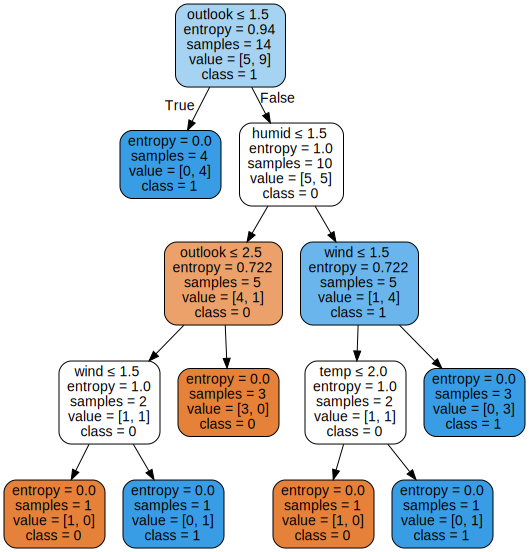

In [10]:
data_feature_name = dataset.columns[:-1]
data_target_name = [str(x) for x in np.unique(dataset[dataset.columns[-1]])]
dot_tree = export_graphviz(model_tree, out_file='mytree.pdf' ,feature_names=data_feature_name,
                           class_names=data_target_name,filled=True, rounded=True,special_characters=True)

with open('mytree.pdf') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)